In [7]:
year=2019
month=11

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../../py')
import db

In [9]:
conn=db.get_conn()

In [33]:
stat_data = pd.read_sql(sql='select * from MonthlyStats order by Month', con=conn)
stat_data

,Month,Salary_Mean,Salary_Median,JD_Count,HeadCount
0,201906,12990,12000,98669,323172
1,201907,13209,12000,94918,308802
2,201908,13388,12500,94569,303830
3,201909,13421,12500,90804,292998
4,201910,13337,12500,87620,284579
5,201911,13451,12500,84685,277672


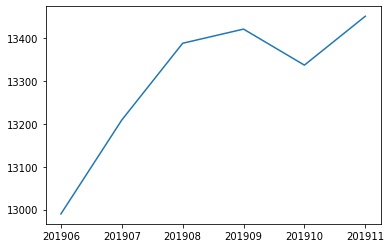

In [10]:
plt.plot("Month","Salary_Mean",data=stat_data)
plt.show()

[0.15393706933077628, 0.12315188546707401, 0.10815511897063086, 0.09083914992306491, 0.05406640947305042, 0.46985036683540354]


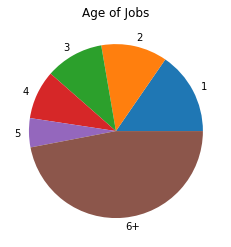

In [12]:
counts=[]
percentages=[]
count1=conn.execute(f"select COUNT(1) from _{year}{month:02}").fetchall()[0][0]
counts.append(count1)

for i in range(1,month-6+1):
    i_count=conn.execute(f"select COUNT(1) from _{year}{month:02} a inner join _{year}{month-i:02} b on a.job_id=b.job_id").fetchall()[0][0]
    counts.append(i_count)
    percentages.append((counts[i-1]-i_count)/counts[0])
    
percentages.append(counts[-1]/counts[0])
print(percentages)

labels=[]
for i in range(1,month-6+1):
    labels.append(i)
labels.append(f"{str(month-6+1)}+")

plt.pie(percentages, labels=labels)
plt.title("Age of Jobs")
plt.show()

# 按照只能统计平均工资

In [25]:
sql=f'select AVG(monthly_salary)  from _{year}{month} where expert_blockchain=1 and monthly_salary>0'
salary_blockchain=conn.execute(sql).fetchall()[0][0]
print(f'区块链工程师 平均工资为{salary_blockchain}')

区块链工程师平均工资为20701


In [26]:
sql=f"select AVG(monthly_salary)  from _{year}{month} where monthly_salary>0 and career='算法工程师'"
salary_algorithm=conn.execute(sql).fetchall()[0][0]
print(f'算法工程师 平均工资为{salary_algorithm}')

算法工程师平均工资为19645


In [27]:
sql=f"select AVG(monthly_salary)  from _{year}{month} where monthly_salary>0 and career='系统架构师'"
salary_architect=conn.execute(sql).fetchall()[0][0]
print(f'系统架构师 平均工资为{salary_architect}')

系统架构师平均工资为23031


In [28]:
sql=f"select AVG(monthly_salary)  from _{year}{month} where monthly_salary>0 and pl_java=1"
salary_java=conn.execute(sql).fetchall()[0][0]
print(f'Java工程师 平均工资为{salary_java}')

Java工程师平均工资为14080


In [29]:
sql=f"select AVG(monthly_salary)  from _{year}{month} where monthly_salary>0 and pl_python=1"
salary_python=conn.execute(sql).fetchall()[0][0]
print(f'Python工程师 平均工资为{salary_python}')

Python工程师平均工资为17882


In [30]:
data_func = pd.DataFrame()

In [31]:
data_func['职能']=['区块链工程师', '算法工程师','系统架构师', 'Java工程师',  'Python工程师']
data_func['工资']=[salary_blockchain, salary_algorithm, salary_architect, salary_java, salary_python]

In [35]:
data_func.sort_values(by='工资', ascending=False)

,职能,工资
2,系统架构师,23031
0,区块链工程师,20701
1,算法工程师,19645
4,Python工程师,17882
3,Java工程师,14080
